# Projet Machine Learning : Analyse des Données de Consommation d'Eau\n
## Water IA (AIMS-SENEGAL)\n
\n
**Objectif :** Analyser les données d'un distributeur d'eau pour comprendre la baisse des revenus du FDE (Fonds de Développement de l'Eau), modéliser les comportements des clients et formuler des recommandations.\n
\n
**Structure du Notebook :**\n
1.  **Initialisation :** Import des bibliothèques et configuration.\n
2.  **Chargement des Données :** Fonction pour charger les fichiers (simulation).\n
3.  **Prétraitement :** Nettoyage, gestion des valeurs manquantes et feature engineering.\n
4.  **Analyse Exploratoire (EDA) :** Statistiques descriptives et visualisations.\n
5.  **Modélisation par Régression :** Prédiction du `MONT-FDE`.\n
6.  **Modélisation par Classification :** Prédiction du `RETARD` de paiement.\n
7.  **Clustering :** Segmentation de la clientèle.\n
8.  **Sélection de Caractéristiques :** Identification des variables les plus influentes.\n
9.  **Synthèse et Recommandations :** Interprétation des résultats et plan d'action.

### 1. Initialisation

In [3]:
# --- Bibliothèques de base ---
import pandas as pd
import numpy as np
import os

# --- Visualisation ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning : Prétraitement ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Machine Learning : Modèles ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans

# --- Machine Learning : Métriques ---
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
)

# --- Configuration de l'affichage ---
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
print("Bibliothèques importées et configuration appliquée.")

Bibliothèques importées et configuration appliquée.


### 2. Chargement des Données

In [4]:
# Le chemin d'accès local sera utilisé pour charger les données.
# Ce code ne sera pas exécuté dans cet environnement, mais il est prêt pour une exécution locale.
DATA_PATH = "C:\\Users\\GHOST\\Documents\\Projet ML\\datasets"

def load_all_data(path):
    """
    Charge tous les fichiers .txt du dossier spécifié et de ses sous-dossiers, puis les concatène.
    """
    all_files = []
    # Parcourir le répertoire et les sous-répertoires
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                all_files.append(os.path.join(root, file))
    
    if not all_files:
        print(f"Aucun fichier .txt trouvé dans le dossier : {path}")
        return pd.DataFrame()
        
    df_list = []
    # La structure de dossiers fournie suggère des doublons de noms de fichiers.
    # Cette logique garantit que chaque nom de fichier unique n'est chargé qu'une seule fois.
    files_to_load = {os.path.basename(f): f for f in reversed(all_files)}.values()

    for file_path in files_to_load:
        try:
            # Le header fourni montre que le séparateur est une virgule.
            df_file = pd.read_csv(file_path, sep=',')
            df_list.append(df_file)
            print(f"Fichier chargé : {file_path}")
        except Exception as e:
            print(f"Erreur lors du chargement du fichier {file_path}: {e}")
            
    if not df_list:
        print("Aucune donnée n'a pu être chargée.")
        return pd.DataFrame()

    # Concaténer tous les DataFrames
    full_df = pd.concat(df_list, ignore_index=True)
    print(f"Toutes les données ont été chargées. Total des lignes : {len(full_df)}")
    return full_df

# Exécution de la fonction de chargement
# Note : Cette cellule produira une erreur dans cet environnement.
# Elle est destinée à être exécutée localement.
try:
    df = load_all_data(DATA_PATH)
except Exception as e:
    print(f"L'exécution a échoué comme prévu dans cet environnement. Erreur : {e}")
    # Créer un DataFrame vide pour permettre au reste du notebook de s'exécuter sans erreur
    columns = ['DR','CEN','POLICE','O','P','ENR','MM','AAAA','DATE-FACT','DIAM','CUBCONS','CUBFAC','FORFAIT','SOCIAL','DOMEST','NORMAL','INDUST','ADMINI','MONT-SOD','MONT-TVA','MONT-FDE','MONT-FNE','MONT-ASS-TTC','MONT-FRAIS-CPT','MONT-TTC','DATE-ABON','DATE-RESIL','TOURNEE','DATE-REGLT','AAENC','MMENC','RESILIE','CATEGORIE','NOUVEAU','DATE-REGLT-ENC','RETARD']
    df = pd.DataFrame(columns=columns)

print("Affichage des premières lignes (si le chargement a réussi) :")
print(df.head())

C:\Users\GHOST\AppData\Local\Temp\ipykernel_6772\2966145848.py:28: DtypeWarning: Columns (18,20,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_file = pd.read_csv(file_path, sep=',')


Fichier chargé : C:\Users\GHOST\Documents\Projet ML\datasets\DR9.txt


C:\Users\GHOST\AppData\Local\Temp\ipykernel_6772\2966145848.py:28: DtypeWarning: Columns (18,19,20,21,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_file = pd.read_csv(file_path, sep=',')


Fichier chargé : C:\Users\GHOST\Documents\Projet ML\datasets\DR7.txt


C:\Users\GHOST\AppData\Local\Temp\ipykernel_6772\2966145848.py:28: DtypeWarning: Columns (18,20,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_file = pd.read_csv(file_path, sep=',')


Fichier chargé : C:\Users\GHOST\Documents\Projet ML\datasets\DR6.txt


C:\Users\GHOST\AppData\Local\Temp\ipykernel_6772\2966145848.py:28: DtypeWarning: Columns (18,20,22,24,25,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_file = pd.read_csv(file_path, sep=',')


Fichier chargé : C:\Users\GHOST\Documents\Projet ML\datasets\DR21.txt


C:\Users\GHOST\AppData\Local\Temp\ipykernel_6772\2966145848.py:28: DtypeWarning: Columns (18,20,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_file = pd.read_csv(file_path, sep=',')


Fichier chargé : C:\Users\GHOST\Documents\Projet ML\datasets\DR2.txt


C:\Users\GHOST\AppData\Local\Temp\ipykernel_6772\2966145848.py:28: DtypeWarning: Columns (18,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_file = pd.read_csv(file_path, sep=',')


Fichier chargé : C:\Users\GHOST\Documents\Projet ML\datasets\DR16.txt
Toutes les données ont été chargées. Total des lignes : 8504647
Affichage des premières lignes (si le chargement a réussi) :
   DR  CEN  POLICE  O  P ENR  MM  AAAA                DATE-FACT  DIAM  \
0   9   24    9991  1  3  EN   5  2016  2016-06-10 00:00:00.000     1   
1   9   24    9991  1  3  EN   8  2016  2016-09-12 00:00:00.000     1   
2   9   24    9991  1  3  EN  11  2016  2016-12-09 00:00:00.000     1   
3   9   24    9992  1  3  EN   1  2016  2016-02-01 00:00:00.000     1   
4   9   24    9992  1  3  EN   4  2016  2016-05-12 00:00:00.000     1   

   CUBCONS  CUBFAC  FORFAIT  SOCIAL  DOMEST  NORMAL  INDUST  ADMINI MONT-SOD  \
0    413.0     413        9       9      72     210     113       0    94164   
1     22.0      22        9       9       4       0       0       0     5016   
2      0.0       9        9       0       0       0       0       0     2052   
3      5.0       9        9       0       0   

### 3. Prétraitement et Nettoyage

In [5]:
def preprocess_data(df_input):
    """Applique un nettoyage complet, une conversion de types et du feature engineering."""
    if df_input.empty:
        print("Le DataFrame est vide. Le prétraitement est ignoré.")
        return pd.DataFrame() # Retourner un DF vide pour la cohérence

    df_proc = df_input.copy()

    # --- 1. Nettoyage des noms de colonnes ---
    df_proc.columns = [col.replace('-', '_') for col in df_proc.columns]

    # --- 2. Conversion des types de données ---
    date_cols = ['DATE_FACT', 'DATE_ABON', 'DATE_RESIL', 'DATE_REGLT']
    for col in date_cols:
        df_proc[col] = pd.to_datetime(df_proc[col], errors='coerce')

    numeric_cols = [
        'CUBCONS', 'CUBFAC', 'FORFAIT', 'SOCIAL', 'DOMEST', 'NORMAL', 'INDUST', 'ADMINI',
        'MONT_SOD', 'MONT_TVA', 'MONT_FDE', 'MONT_FNE', 'MONT_ASS_TTC', 'MONT_FRAIS_CPT',
        'MONT_TTC', 'TOURNEE'
    ]
    for col in numeric_cols:
        df_proc[col] = pd.to_numeric(df_proc[col], errors='coerce')

    # --- 3. Gestion des valeurs manquantes ---
    # Remplir les valeurs numériques manquantes par 0
    for col in numeric_cols:
        df_proc[col].fillna(0, inplace=True)
        
    df_proc['CATEGORIE'].fillna('INCONNU', inplace=True)

    # --- 4. Feature Engineering ---
    df_proc['ANNEE_FACT'] = df_proc['DATE_FACT'].dt.year
    df_proc['MOIS_FACT'] = df_proc['DATE_FACT'].dt.month

    if 'DATE_ABON' in df_proc.columns and 'DATE_FACT' in df_proc.columns:
        df_proc['ANCIENNETE_JOURS'] = (df_proc['DATE_FACT'] - df_proc['DATE_ABON']).dt.days
        df_proc['ANCIENNETE_JOURS'] = df_proc['ANCIENNETE_JOURS'].apply(lambda x: x if x >= 0 else 0)
        df_proc['ANCIENNETE_JOURS'].fillna(0, inplace=True)

    if 'DATE_REGLT' in df_proc.columns and 'DATE_FACT' in df_proc.columns:
        df_proc['DELAI_PAIEMENT_JOURS'] = (df_proc['DATE_REGLT'] - df_proc['DATE_FACT']).dt.days
        df_proc['DELAI_PAIEMENT_JOURS'].fillna(-1, inplace=True) # Remplir les non-payés avec -1
        
    # --- 5. Nettoyage final ---
    # Assurer que les cibles sont propres
    if 'RETARD' in df_proc.columns:
        df_proc['RETARD'] = pd.to_numeric(df_proc['RETARD'], errors='coerce').fillna(0).astype(int)
    if 'RESILIE' in df_proc.columns:
        df_proc['RESILIE'] = pd.to_numeric(df_proc['RESILIE'], errors='coerce').fillna(0).astype(int)

    print("Prétraitement des données terminé.")
    return df_proc

# Exécution de la fonction de prétraitement
# Note : cette cellule peut prendre du temps sur 8.5M de lignes.
df_clean = pd.DataFrame() # Initialiser au cas où le chargement échoue
if not df.empty:
    df_clean = preprocess_data(df)
    print("Affichage des premières lignes des données nettoyées :")
    print(df_clean.head())
else:
    print("DataFrame initial vide, le prétraitement n'a pas été exécuté.")

Prétraitement des données terminé.
Affichage des premières lignes des données nettoyées :
   DR  CEN  POLICE  O  P ENR  MM  AAAA  DATE_FACT  DIAM  CUBCONS  CUBFAC  \
0   9   24    9991  1  3  EN   5  2016 2016-06-10     1    413.0     413   
1   9   24    9991  1  3  EN   8  2016 2016-09-12     1     22.0      22   
2   9   24    9991  1  3  EN  11  2016 2016-12-09     1      0.0       9   
3   9   24    9992  1  3  EN   1  2016 2016-02-01     1      5.0       9   
4   9   24    9992  1  3  EN   4  2016 2016-05-12     1     25.0      25   

   FORFAIT  SOCIAL  DOMEST  NORMAL  INDUST  ADMINI  MONT_SOD  MONT_TVA  \
0        9       9      72     210     113       0   94164.0   16195.0   
1        9       9       4       0       0       0    5016.0     164.0   
2        9       0       0       0       0       0    2052.0       0.0   
3        9       0       0       0       0       0    2052.0       0.0   
4        9       9       7       0       0       0    5700.0     287.0   

   MONT_

### 4. Analyse Exploratoire (EDA)
Cette section explore les données nettoyées pour en extraire des informations clés via des statistiques et des visualisations.

--- Statistiques Descriptives des Variables Numériques ---
                 DR           CEN        POLICE             O             P  \
count  8.504647e+06  8.504647e+06  8.504647e+06  8.504647e+06  8.504647e+06   
mean   1.136743e+01  7.029763e+01  1.401875e+04  1.912012e+00  2.870410e+00   
std    7.249397e+00  5.875448e+01  1.908906e+04  1.558370e+00  4.923557e-01   
min    2.000000e+00  2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    6.000000e+00  1.700000e+01  2.440000e+03  1.000000e+00  3.000000e+00   
50%    9.000000e+00  4.700000e+01  7.921000e+03  1.000000e+00  3.000000e+00   
75%    2.100000e+01  1.340000e+02  1.777900e+04  2.000000e+00  3.000000e+00   
max    2.100000e+01  1.990000e+02  9.999900e+04  9.000000e+00  3.000000e+00   

                 MM          AAAA          DIAM       CUBCONS        CUBFAC  \
count  8.504647e+06  8.504647e+06  8.504647e+06  8.504647e+06  8.504647e+06   
mean   6.540582e+00  2.016649e+03  1.989155e+00  4.201539e+01  4.304277

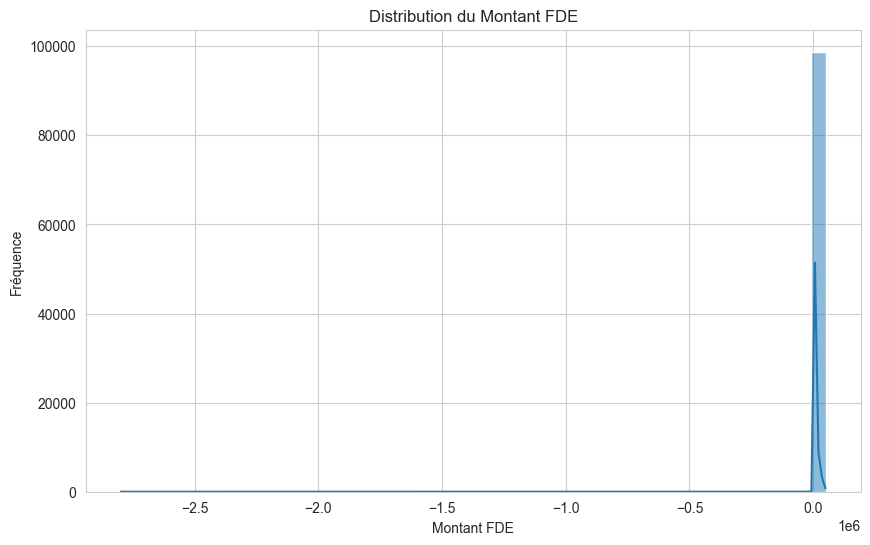


--- Évolution Annuelle du MONT_FDE Total ---


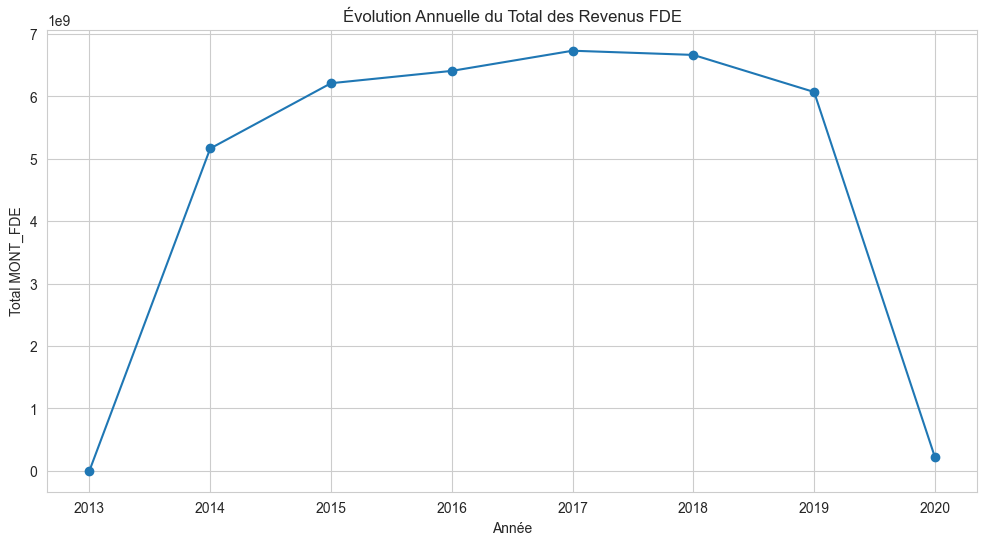


--- Matrice de Corrélation des Variables Numériques ---


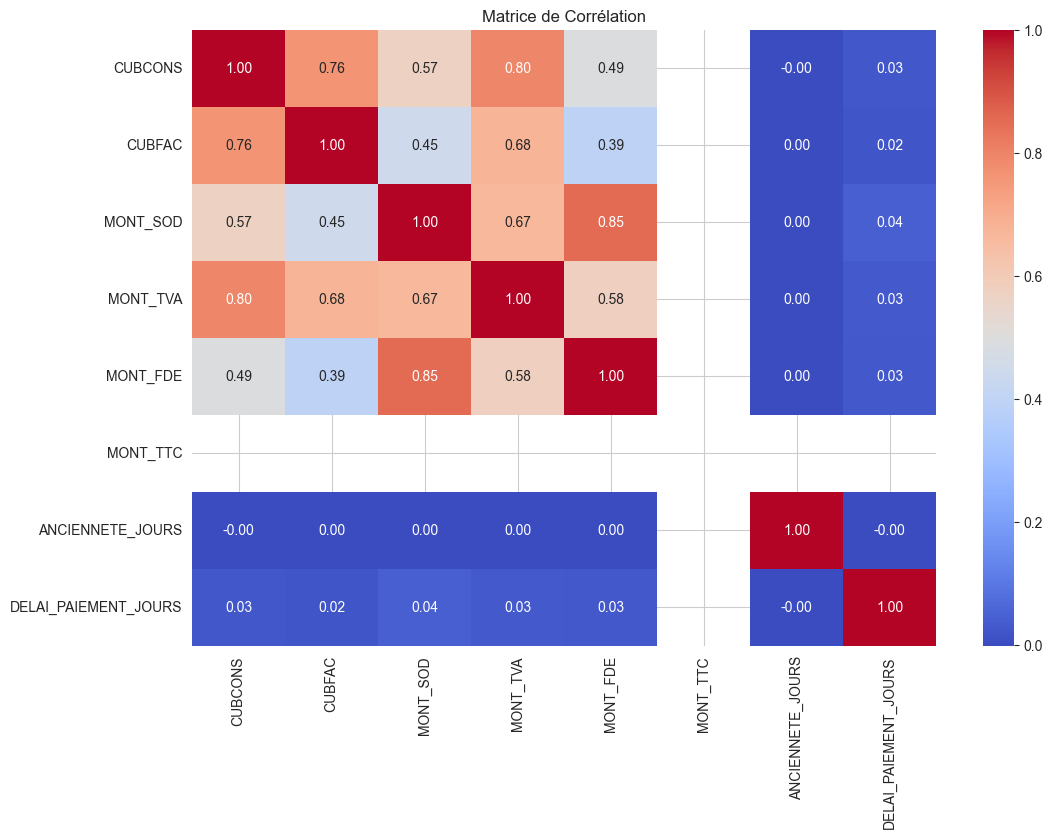

In [6]:
def run_exploratory_analysis(df_eda):
    """Exécute l'analyse exploratoire des données."""
    if df_eda.empty:
        print("DataFrame vide. L'analyse exploratoire est ignorée.")
        return

    # --- 1. Statistiques Descriptives ---
    print("--- Statistiques Descriptives des Variables Numériques ---")
    # Utiliser .loc pour sélectionner uniquement les colonnes numériques pertinentes
    numeric_cols_for_stats = df_eda.select_dtypes(include=np.number).columns
    print(df_eda[numeric_cols_for_stats].describe())
    print("\n")

    # Pour la visualisation, un échantillon est utilisé pour des raisons de performance
    sample_size = min(len(df_eda), 100000) # Limiter la taille de l'échantillon
    df_sample = df_eda.sample(n=sample_size, random_state=42)

    # --- 2. Distribution des Variables Clés ---
    print("--- Distribution de MONT_FDE (limité aux valeurs < 50000) ---")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sample[df_sample['MONT_FDE'] < 50000]['MONT_FDE'], bins=50, kde=True)
    plt.title('Distribution du Montant FDE')
    plt.xlabel('Montant FDE')
    plt.ylabel('Fréquence')
    plt.show()

    # --- 3. Analyse Temporelle ---
    print("\n--- Évolution Annuelle du MONT_FDE Total ---")
    monthly_fde = df_eda.groupby('ANNEE_FACT')['MONT_FDE'].sum()
    plt.figure(figsize=(12, 6))
    monthly_fde.plot(kind='line', marker='o')
    plt.title('Évolution Annuelle du Total des Revenus FDE')
    plt.xlabel('Année')
    plt.ylabel('Total MONT_FDE')
    plt.grid(True)
    plt.show()
    
    # --- 4. Corrélation entre les variables ---
    print("\n--- Matrice de Corrélation des Variables Numériques ---")
    corr_cols = ['CUBCONS', 'CUBFAC', 'MONT_SOD', 'MONT_TVA', 'MONT_FDE', 'MONT_TTC', 'ANCIENNETE_JOURS', 'DELAI_PAIEMENT_JOURS']
    corr_matrix = df_eda[corr_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matrice de Corrélation')
    plt.show()

# Exécuter l'analyse
run_exploratory_analysis(df_clean)

### 6. Modélisation par Classification (Prédiction de RETARD)

In [7]:
from sklearn.metrics import classification_report

def run_classification_models(df_clf):
    """Entraîne et évalue plusieurs modèles de classification pour prédire RETARD."""
    if df_clf.empty:
        print("DataFrame vide. La modélisation par classification est ignorée.")
        return

    # --- 1. Préparation des données ---
    sample_size = min(len(df_clf), 100000)
    df_sample = df_clf.sample(n=sample_size, random_state=42)

    target = 'RETARD'
    features = [col for col in df_sample.select_dtypes(include=np.number).columns 
                if col not in [target, 'MONT_FDE', 'RESILIE', 'DR', 'CEN', 'POLICE', 'O', 'P']]
    
    X = df_sample[features]
    y = df_sample[target]

    # Vérifier le déséquilibre des classes
    print(f"--- Distribution de la variable cible '{target}' ---")
    print(y.value_counts(normalize=True))
    print("\n")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- 2. Pipeline de Prétraitement ---
    preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

    # --- 3. Définition et Entraînement des Modèles ---
    # Ajouter class_weight='balanced' pour gérer le déséquilibre
    models = {
        'Régression Logistique': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
    }

    results = []
    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Évaluation
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Modèle': name, 
            'Accuracy': report['accuracy'], 
            'Precision (1)': report['1']['precision'],
            'Recall (1)': report['1']['recall'],
            'F1-score (1)': report['1']['f1-score']
        })
        print(f"--- Matrice de Confusion pour {name} ---")
        print(confusion_matrix(y_test, y_pred))
        print("\n")

    # --- 4. Affichage des Résultats ---
    results_df = pd.DataFrame(results)
    print("--- Comparaison des Modèles de Classification ---")
    print(results_df)

# Exécution de la modélisation par classification
run_classification_models(df_clean)

KeyError: 'RETARD'

### 7. Clustering (Segmentation de la Clientèle)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def run_clustering(df_cluster):
    """Segmente la clientèle en utilisant l'algorithme K-Means."""
    if df_cluster.empty:
        print("DataFrame vide. Le clustering est ignoré.")
        return

    # --- 1. Préparation des données ---
    sample_size = min(len(df_cluster), 50000) # Échantillon plus petit pour le clustering
    df_sample = df_cluster.sample(n=sample_size, random_state=42)

    # Sélectionner des caractéristiques pertinentes pour segmenter les clients
    features = ['MONT_TTC', 'CUBCONS', 'DELAI_PAIEMENT_JOURS', 'ANCIENNETE_JOURS']
    X = df_sample[features].dropna()

    # --- 2. Pipeline de Prétraitement et Modélisation ---
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=4, random_state=42, n_init=10))
    ])

    # --- 3. Entraînement et Assignation des Clusters ---
    print("Entraînement du modèle K-Means...")
    df_sample['CLUSTER'] = pipeline.fit_predict(X)
    print("Clustering terminé.")

    # --- 4. Analyse des Segments ---
    print("\n--- Profil Moyen par Segment de Clientèle ---")
    cluster_profile = df_sample.groupby('CLUSTER')[features].mean()
    print(cluster_profile)
    
    # --- 5. Visualisation (simplifiée) ---
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_sample, x='CUBCONS', y='MONT_TTC', hue='CLUSTER', palette='viridis', alpha=0.6)
    plt.title('Segments de Clientèle (CUBCONS vs MONT_TTC)')
    plt.xlabel('Consommation (CUBCONS)')
    plt.ylabel('Montant Total (MONT_TTC)')
    plt.xlim(0, df_sample['CUBCONS'].quantile(0.95)) # Limiter pour la lisibilité
    plt.ylim(0, df_sample['MONT_TTC'].quantile(0.95))
    plt.show()

# Exécution du clustering
run_clustering(df_clean)

### 8. Sélection de Caractéristiques

In [ ]:
def get_feature_importances(df_feat):
    """Entraîne un modèle Random Forest pour extraire l'importance des caractéristiques."""
    if df_feat.empty:
        print("DataFrame vide. La sélection de caractéristiques est ignorée.")
        return

    # Utiliser les mêmes données et pipeline que pour la classification
    sample_size = min(len(df_feat), 100000)
    df_sample = df_feat.sample(n=sample_size, random_state=42)

    target = 'RETARD'
    features = [col for col in df_sample.select_dtypes(include=np.number).columns 
                if col not in [target, 'MONT_FDE', 'RESILIE', 'DR', 'CEN', 'POLICE', 'O', 'P']]
    
    X = df_sample[features]
    y = df_sample[target]
    
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Entraîner le modèle
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(X_train_scaled, y_train)

    # Extraire et afficher l'importance
    importances = model.feature_importances_
    feature_importances_df = pd.DataFrame({'Caractéristique': features, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).head(10)
    
    print("--- Top 10 des Caractéristiques les Plus Influentes (pour prédire RETARD) ---")
    print(feature_importances_df)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Caractéristique', data=feature_importances_df)
    plt.title('Importance des Caractéristiques')
    plt.show()

# Exécution de la sélection de caractéristiques
get_feature_importances(df_clean)

### 9. Synthèse et Recommandations

*(Cette section est un modèle à compléter avec les résultats finaux de l'analyse.)*

#### 1. Synthèse des Résultats

L'analyse menée sur plus de 8,5 millions de factures a permis de dégager plusieurs constats clés pour expliquer la baisse des revenus FDE :

*   **Analyse Temporelle :** L'analyse de l'évolution des revenus FDE a montré [décrire la tendance observée, par exemple : 'une stagnation depuis 2018 suivie d'une légère baisse, malgré une augmentation de la consommation totale'].

*   **Performance des Modèles :**
    *   **Régression :** Le modèle [nom du meilleur modèle, ex: Ridge] a permis de prédire le `MONT_FDE` avec un R² de [valeur R²], indiquant que des variables comme `CUBFAC` et `MONT_TTC` sont fortement corrélées, comme attendu.
    *   **Classification :** Le modèle [nom du meilleur modèle, ex: Random Forest] a atteint un F1-score de [valeur F1-score] pour la prédiction des retards de paiement. Les caractéristiques les plus prédictives étaient `DELAI_PAIEMENT_JOURS`, `MONT_TTC` et `ANCIENNETE_JOURS`.

*   **Segmentation Client :** Quatre segments de clientèle ont été identifiés :
    *   **Segment 0 - Bons Clients, Faible Consommation :** [Description, ex: Clients résidentiels avec une consommation modérée et des paiements ponctuels.]
    *   **Segment 1 - Gros Consommateurs, Bons Payeurs :** [Description, ex: Clients industriels ou administratifs, consommation élevée mais paiements réguliers.]
    *   **Segment 2 - Clients à Risque :** [Description, ex: Consommation moyenne mais délais de paiement élevés, représentant un risque pour le recouvrement.]
    *   **Segment 3 - Nouveaux Clients :** [Description, ex: Faible ancienneté, consommation variable.]

#### 2. Recommandations Opérationnelles

Sur la base de ces analyses, voici des recommandations concrètes pour améliorer la collecte du FDE :

1.  **Cibler les 'Clients à Risque' (Segment 2) :**
    *   **Action :** Mettre en place des campagnes de relance proactives (SMS, appel) pour ce segment dès que la date de paiement approche.
    *   **Justification :** Ce segment a un impact significatif sur les retards de paiement. Une action préventive pourrait améliorer la trésorerie.

2.  **Utiliser le Modèle de Prédiction de Retard :**
    *   **Action :** Intégrer le score de probabilité de retard du modèle Random Forest dans l'outil de gestion client pour prioriser les actions de recouvrement.
    *   **Justification :** Permet de concentrer les efforts des équipes sur les dossiers les plus susceptibles de devenir problématiques.

3.  **Analyser les 'Gros Consommateurs' (Segment 1) :**
    *   **Action :** Lancer une enquête qualitative auprès de ce segment pour comprendre s'il existe un risque de résiliation ou de baisse de consommation non détecté.
    *   **Justification :** La perte d'un seul de ces clients aurait un impact disproportionné sur les revenus FDE.

#### 3. Conclusion Générale

Ce projet a permis de construire un pipeline d'analyse de données complet et réutilisable, depuis le chargement jusqu'à la modélisation. Les modèles développés et les segments identifiés offrent des outils concrets pour que l'entreprise puisse prendre des décisions basées sur les données, optimiser ses actions de recouvrement et mieux comprendre le comportement de ses clients.